In [2]:
from laptoppriceworkflow.data import get_json_data 
from laptoppriceworkflow.functions import clean_col_meta
from laptoppriceworkflow.functions import simplify_gwarancja
from laptoppriceworkflow.functions import simplify_komunikacja

import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline, make_pipeline, make_union

from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [4]:
df = get_json_data()

In [5]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [6]:
train.head(2)

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
70,1599.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3,1.9,intel core i3,nowy,500.0,sprzedawcy,"13"" - 13.9"""
407,2999.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,16 gb,[windows 7 professional 64-bit],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3l,2.1,intel pentium dual-core,nowy,480.0,producenta,"15"" - 15.9"""


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5854 entries, 70 to 5978
Data columns (total 17 columns):
buynow_price                         5854 non-null float64
rodzaj karty graficznej              5488 non-null object
komunikacja                          5262 non-null object
rozdzielczość (piksele)              5398 non-null object
liczba rdzeni procesora              5854 non-null object
wielkość pamięci ram                 5515 non-null object
system operacyjny                    5367 non-null object
typ dysku twardego                   5530 non-null object
sterowanie                           5347 non-null object
multimedia                           5322 non-null object
typ pamięci ram                      5194 non-null object
taktowanie bazowe procesora (ghz)    5136 non-null float64
seria procesora                      5455 non-null object
stan                                 5854 non-null object
pojemność dysku (gb)                 5497 non-null float64
gwarancja          

In [8]:
train.describe(include = 'all')

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
count,5854.000000,5488,5262,5398,5854,5515,5367,5530,5347,5322,5194,5136.000000,5455,5854,5497.000000,5854,5598
unique,NaN,2,100,12,6,11,21,5,11,15,3,NaN,18,1,NaN,3,6
top,NaN,grafika dedykowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr4,NaN,intel core i5,nowy,NaN,producenta,"15"" - 15.9"""
freq,NaN,3242,1424,3378,3573,2316,2847,2829,1725,4312,3355,NaN,1908,5854,NaN,4965,3961
mean,3472.822094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.334801,NaN,NaN,647.354193,NaN,NaN
std,1740.534096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393378,NaN,NaN,476.000079,NaN,NaN
min,429.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,2199.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,256.000000,NaN,NaN
50%,3149.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,500.000000,NaN,NaN
75%,4388.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000,NaN,NaN,1000.000000,NaN,NaN


In [10]:
train.isnull().sum()/train.shape[0]

buynow_price                         0.000000
rodzaj karty graficznej              0.062521
komunikacja                          0.101127
rozdzielczość (piksele)              0.077895
liczba rdzeni procesora              0.000000
wielkość pamięci ram                 0.057909
system operacyjny                    0.083191
typ dysku twardego                   0.055347
sterowanie                           0.086607
multimedia                           0.090878
typ pamięci ram                      0.112743
taktowanie bazowe procesora (ghz)    0.122651
seria procesora                      0.068159
stan                                 0.000000
pojemność dysku (gb)                 0.060984
gwarancja                            0.000000
wielkość matrycy                     0.043731
dtype: float64

In [11]:
train.corr()

,buynow_price,taktowanie bazowe procesora (ghz),pojemność dysku (gb)
buynow_price,1.000000,0.590060,0.259655
taktowanie bazowe procesora (ghz),0.590060,1.000000,0.286529
pojemność dysku (gb),0.259655,0.286529,1.000000


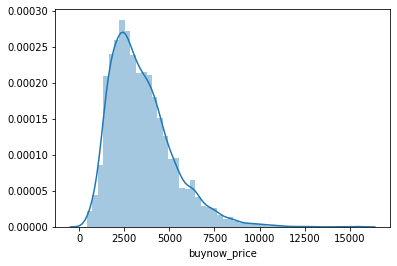

In [12]:
sns.distplot(train["buynow_price"])
plt.show()

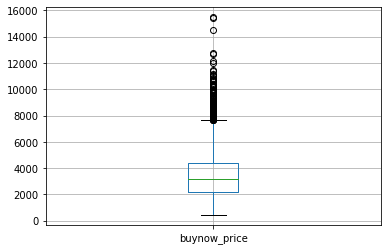

In [13]:
train.boxplot("buynow_price")

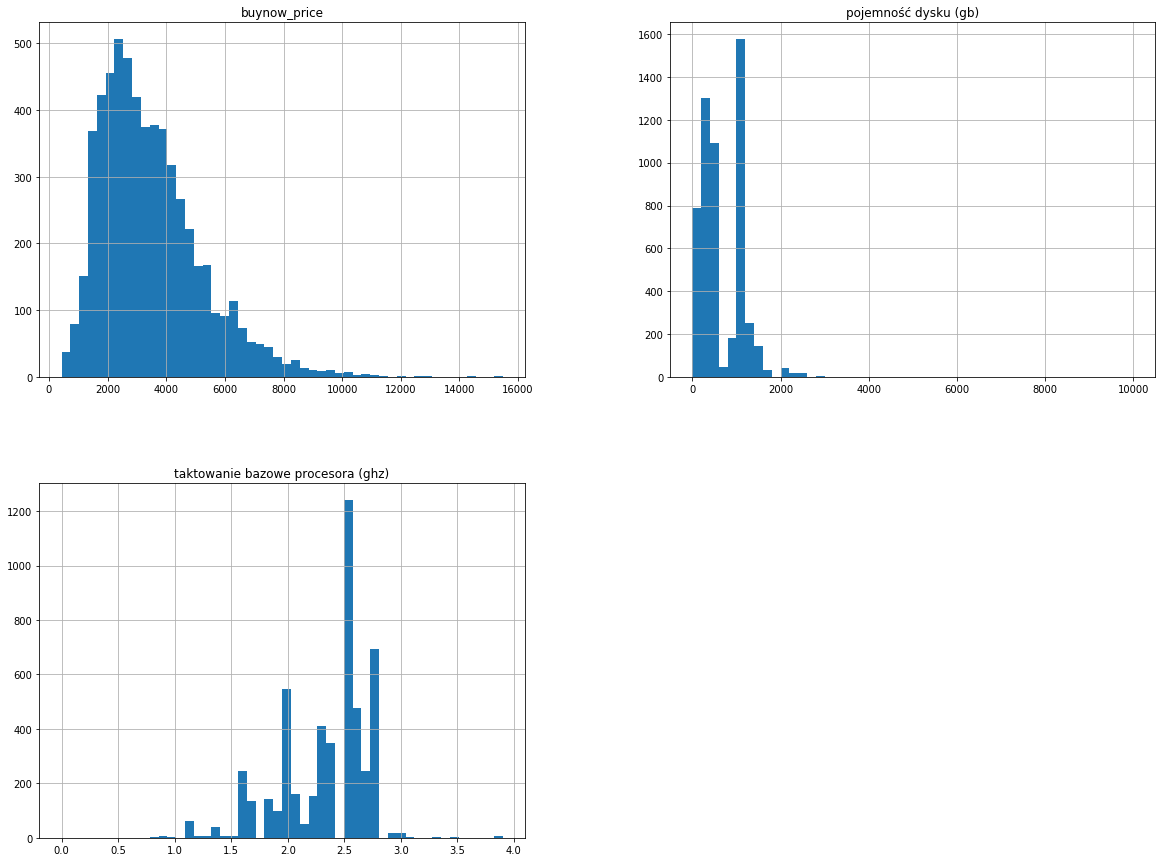

In [16]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [49]:
class FeatureEng(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #imm = joblib.load(PATH_TO_IMM)
        #metadata_dense = reduce_mem_usage(pd.read_csv(METADATA_DENSE).fillna(0))
        #X["country"] = X["city"].map(lambda x: x.split(",")[-1].strip())
        X["rodzaj karty graficznej"].fillna("", inplace=True)
        X["komunikacja"].fillna("", inplace=True)
        X["rozdzielczość (piksele)"].fillna("", inplace=True)
        
        X['rozdzielczosc_piksele'] = X["rozdzielczość (piksele)"].map(lambda x: 1 if x == '1920 x 1080' else 0)
        X.drop('rozdzielczość (piksele)', axis = 1)
        
        #X['liczba_rdzeni_proc_trans'] = ['2' if x == '2' else '' for x in X.loc[:,"liczba rdzeni procesora"]]
        X['liczba_rdzeni_proc_trans'] = X['liczba rdzeni procesora'].map(lambda x: '2' if x == '2' else '')
        
        X.drop('liczba rdzeni procesora', axis = 1)
        
        X["wielkość pamięci ram"].fillna('0', inplace=True)
        
        #X["wielkosc_pamieci_ram_trans"] = [0 if "mb" in x else int(x.strip('gb')) for x in X.loc[:, "wielkość pamięci ram"]]
        X["wielkosc_pamieci_ram_trans"] = X["wielkość pamięci ram"].map(lambda x: 0 if "mb" in x else int(x.strip('gb')))
        
        X.drop("wielkość pamięci ram", axis = 1)
        
        X["system operacyjny"].fillna('', inplace=True)
        X["typ dysku twardego"].fillna('', inplace=True)
        X["lan"] = X['komunikacja'].map(lambda x: 1 if any("lan" in i for i in x) else 0)
        X["wi-fi"] = X['komunikacja'].map(lambda x: 1 if any("wi-fi" in i for i in x) else 0)
        X["nfc"] = X['komunikacja'].map(lambda x: 1 if any("nfc" in i for i in x) else 0)
        
        X.drop("komunikacja", axis = 1)
        
        X['windows'] = X['system operacyjny'].map(lambda x: 1 if any("windows" in i for i in x) else 0)
        X.drop("system operacyjny", axis = 1)
        
        return X

In [17]:
laps = train.copy()

### duże zagęszczenie punktów danych

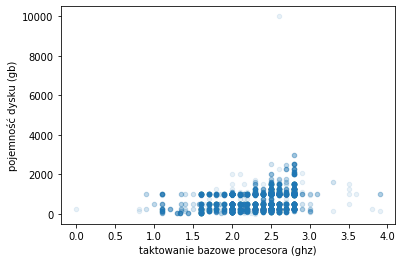

In [21]:
laps.plot(kind="scatter", x="taktowanie bazowe procesora (ghz)", y="pojemność dysku (gb)", alpha=0.1)



No handles with labels found to put in legend.


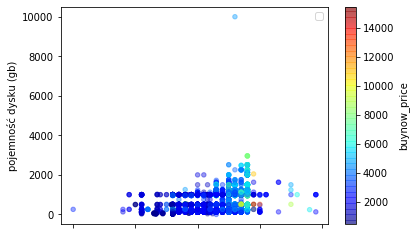

In [29]:
train.plot(kind="scatter", x="taktowanie bazowe procesora (ghz)", y="pojemność dysku (gb)", alpha=0.4,
    #s=train["buynow_price"]/100, label="Cena", figsize=(10,7),
    c="buynow_price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [42]:
corr_matrix = train.corr()
corr_matrix['buynow_price'] 

buynow_price                         1.000000
taktowanie bazowe procesora (ghz)    0.590060
pojemność dysku (gb)                 0.259655
Name: buynow_price, dtype: float64

In [44]:
from pandas.tools.plotting import scatter_matrix

#attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(train, figsize=(12, 8))

ModuleNotFoundError: No module named 'pandas.tools'

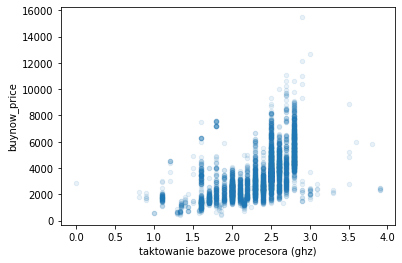

In [46]:
laps.plot(kind="scatter", x="taktowanie bazowe procesora (ghz)", y="buynow_price", alpha=0.1)

In [47]:
laps = train.drop("buynow_price", axis=1)
laps_labels = train["buynow_price"].copy()

In [21]:
vectorizer = FeatureEng()
ddd = vectorizer.fit_transform(test)
ddd
#ddd  = FeatureEng.fit_transform(train)

C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy,liczba_rdzeni_proc_trans,wielkosc_pamieci_ram_trans,lan,wi-fi,nfc,windows
4586,1769.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3,1.7,intel core i3,nowy,256.0,sprzedawcy,"15"" - 15.9""",2,8,1,1,0,1
7524,5043.00,grafika dedykowana,"[bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki]",ddr3,2.6,intel core i5,nowy,1000.0,producenta,"15"" - 15.9""",2,8,1,0,0,1
1817,4299.00,grafika dedykowana,,1920 x 1080,4,0,,ssd + hdd,None,None,None,NaN,intel core i5,nowy,NaN,producenta,"15"" - 15.9""",,0,0,0,0,0
5561,899.00,,,,2,0,,,None,None,None,NaN,None,nowy,NaN,producenta,None,2,0,0,0,0,0
5801,1877.00,grafika zintegrowana,"[bluetooth, nfc (near field communication), modem 3g (wwan)]",1600 x 900,4,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3l,2.0,amd a6,nowy,128.0,producenta,"17"" - 17.9""",,8,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11455,4849.00,grafika dedykowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[klawiatura, touchpad, klawiatura podświetlana, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr4,2.8,intel core i7,nowy,1250.0,producenta,"15"" - 15.9""",,16,1,1,0,1
6115,4296.55,grafika dedykowana,[bluetooth],1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3,2.4,intel core i7,nowy,256.0,sprzedawcy,"15"" - 15.9""",2,8,0,0,0,1
6423,4599.00,grafika dedykowana,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[brak systemu],hdd,"[klawiatura, touchpad, klawiatura podświetlana, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr4,2.6,intel core i7,nowy,1000.0,producenta,"17"" - 17.9""",,32,1,0,0,0
10541,1329.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,4 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3,1.6,intel celeron dual-core,nowy,128.0,sprzedawcy,"15"" - 15.9""",2,4,1,1,0,1


In [51]:
class PandasToNpArray(BaseEstimator, TransformerMixin):
    def fit(self, X, *arg):
        return self

    def transform(self, X):
        return X.values.astype(np.float)

In [58]:
preprocessor = make_pipeline(
        FeatureEng(),
            ColumnTransformer(
            [
                (
                    "cat_vars",
                    make_pipeline(OneHotEncoder(sparse=False)),
                    #list(['gwarancja']),
                    ['rodzaj karty graficznej','gwarancja','rozdzielczosc_piksele','liczba_rdzeni_proc_trans'],
                ),
               (
                    "ram",
                    #make_pipeline(PandasToNpArray(), SimpleImputer(strategy="constant", fill_value=-9999)),
                    make_pipeline(SimpleImputer(strategy="constant", fill_value=-9999)),
                    ['wielkosc_pamieci_ram_trans'],
                ),
              (
                    "other_vars",
                    #make_pipeline(PandasToNpArray(),StandardScaler()),
                    make_pipeline(StandardScaler()),
                    ['lan','wi-fi', 'nfc', 'windows','rozdzielczosc_piksele'],
                ),
                
                
                
            ]
        )
)

In [57]:
preprocessor.fit_transform(train)[1]

C:\Users\marcin.sadowski\Miniconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\marcin.sadowski\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\marcin.sadowski\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

array([ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
       16.        ,  0.5809008 ,  1.14502994, -0.47238846,  0.58589823,
       -1.16803136])

In [59]:
from sklearn.linear_model import Ridge

In [67]:
ridge_model = Ridge(
    solver='auto', fit_intercept=True, alpha=1.0,
    max_iter=100, normalize=False, tol=0.05, random_state = 1,
)

In [64]:
linear_model = LinearRegression(

)

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [71]:
pipeline = make_pipeline(
    preprocessor,
    tree_reg
)

In [72]:
pipeline.fit(train, train['buynow_price'])
preds = pipeline.predict(test)

lin_mse = mean_squared_error(preds, test['buynow_price'])
lin_rmse = np.sqrt(lin_mse)
lin_rmse

C:\Users\marcin.sadowski\Miniconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\marcin.sadowski\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\marcin.sadowski\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1044.492794049366

In [ ]:
R: 1232.76761173908 
LR: 1232.757251272387 
DT: 1044.492794049366   

In [63]:
preds

array([4257.73620057, 1862.40586638, 1672.5522976 , ..., 2507.48731624,
       1935.87798639, 2809.82973551])